<a href="https://colab.research.google.com/github/Cheatcode33/Cheatcode33/blob/main/Lead_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lead Scoring - A Logistic Regression Study**




## Problem Statement :
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
Business Goal :
X Education want to develop a model to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

##Goal of the Case Study is :

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [ ]:
##importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [ ]:
## importing dataset

leads=pd.read_csv("/content/Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
## rows and columns in dataset
leads.shape

(9240, 37)

In [ ]:
## data check
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
## check duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

no duplicates in Prospect ID

In [ ]:
## check duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

no duplicates in Lead Number

EXPLORATORY DATA ANALYSIS

Data Cleaning

In [ ]:
# dropping Lead Number and Prospect ID since they have unique values

leads.drop(['Prospect ID','Lead Number'],1,inplace= True)

In [ ]:
## convert Select values to nan

leads= leads.replace('Select',np.nan)

In [ ]:
## checking  null

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [ ]:
## % null values in each column

round(100*(leads.isnull().sum()/len(leads.index)),2)


Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [ ]:
## dropping cols with missing values>45%

cols=leads.columns
for i in cols:
  if((100*(leads[i].isnull().sum()/len(leads.index)))>= 45):
    leads.drop(i, 1, inplace= True)

In [ ]:
## checking null value%
round(100*(leads.isnull().sum()/len(leads.index)),2)


Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

Categorical analysis

In [ ]:
## checking value  counts in Country

leads['Country'].value_counts(dropna= False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

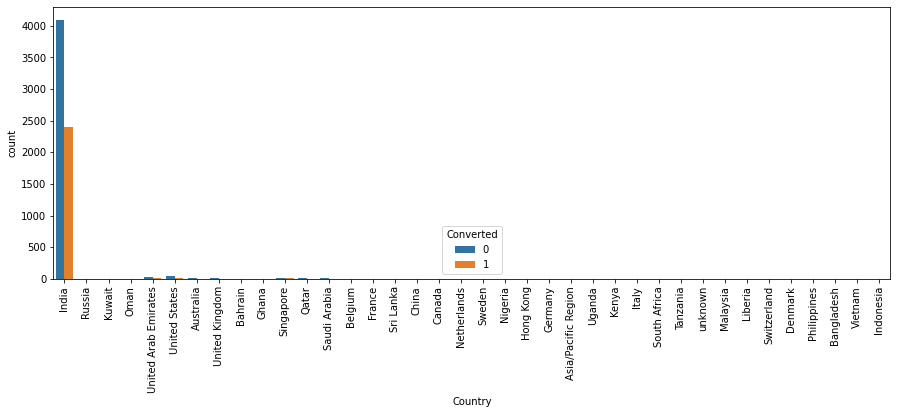

In [ ]:
## plotting spread of country
plt.figure(figsize=(15,5))
s1= sns.countplot(leads.Country , hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

India is the most common occurence

In [ ]:
## impute missing values with India

leads['Country']= leads['Country'].replace(np.nan,'India')

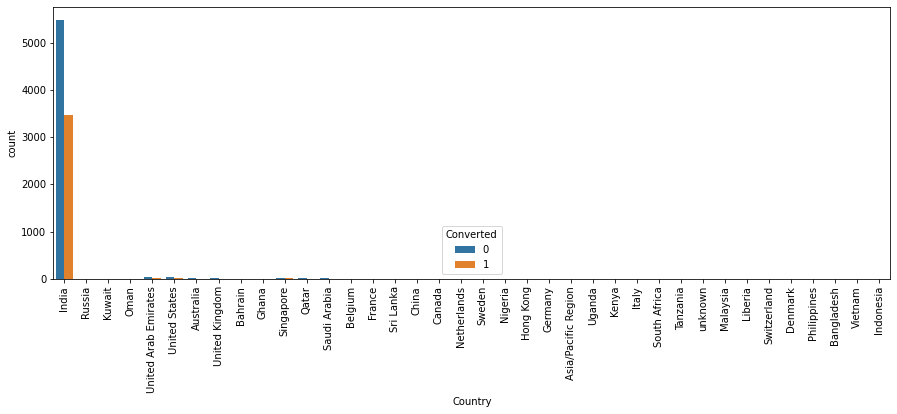

In [ ]:
## plotting spread of country after replacement
plt.figure(figsize=(15,5))
s1= sns.countplot(leads.Country , hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Number of values for India are quite high , this column can ge dropped

In [ ]:
## list of cols to ge dropped
cols_to_drop =['Country']

In [ ]:
## value count for City column

leads['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
## replacing nan with Mumbai

leads['City']= leads['City'].replace(np.nan,'Mumbai')

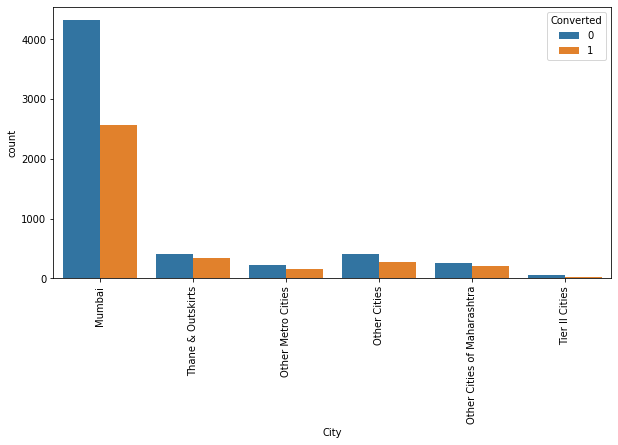

In [ ]:
## plotting spread of city  after replacement
plt.figure(figsize=(10,5))
s1= sns.countplot(leads.City , hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
## value dount for Specializatio  column

leads['Specialization'].value_counts(dropna=False)



Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
## replacing nan with Not Specifie
leads['Specialization']= leads['Specialization'].replace(np.nan,'Not Specified')


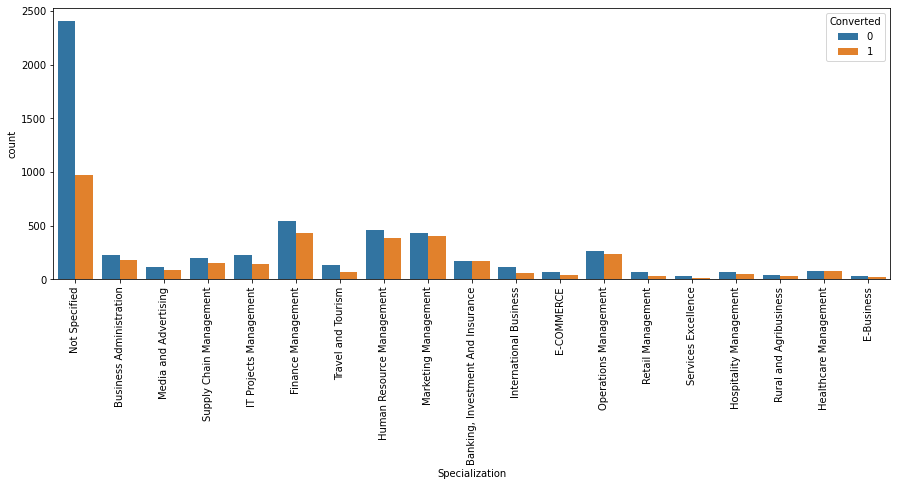

In [ ]:
## plotting spread of Specialization  after replacement
plt.figure(figsize=(15,5))
s1= sns.countplot(leads.Specialization , hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

specialization with Management in them hqve higher no of leads as well as conversio

In [ ]:
## combining management specialization
leads['Specialization']= leads['Specialization'].replace(['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'IT Projects Management', 'Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'], 'Management_Specializations')


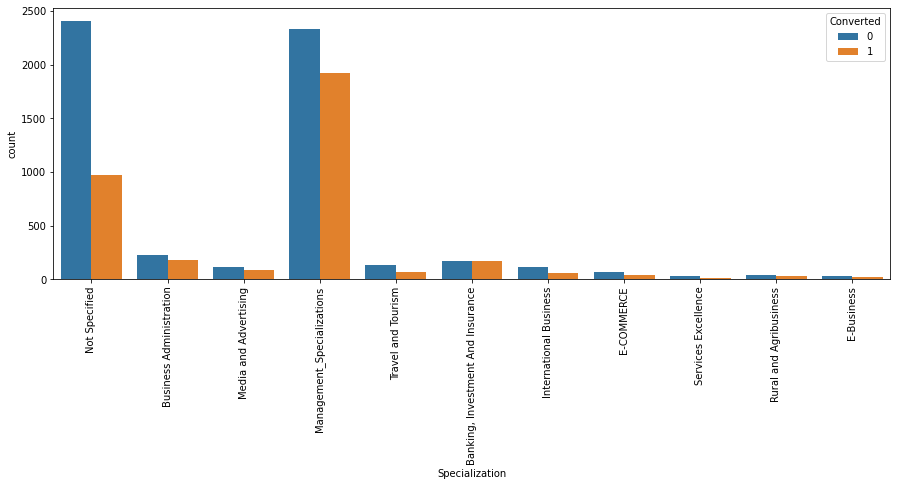

In [ ]:
## plotting spread of Specialization  after conversation
plt.figure(figsize=(15,5))
s1= sns.countplot(leads.Specialization , hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
## What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
# imputing with Unemployed

leads['What is your current occupation']= leads['What is your current occupation'].replace(np.nan,'Unemployed')


In [ ]:
## count of values
leads['What is your current occupation'].value_counts(dropna= False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

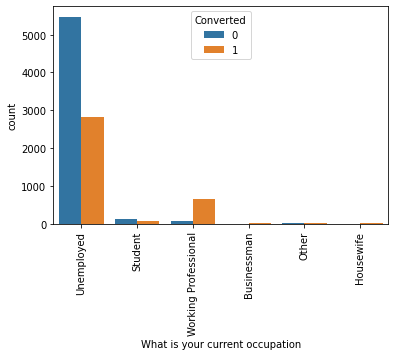

In [ ]:
## plotting spread of variable  after conversation
s1= sns.countplot(leads['What is your current occupation'] , hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

1.working professionals have high chances of joining
2. unemployed leads are most

In [ ]:
## checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
## replacing nan with Better Career Prospects

leads['What matters most to you in choosing a course']= leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

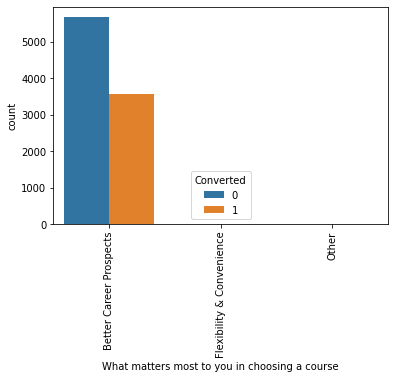

In [ ]:
## plotting spread of variable  after conversation
s1= sns.countplot(leads['What matters most to you in choosing a course'] , hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
## checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

another column worth dropping
append cols_to_drop list

In [ ]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'What matters most to you in choosing a course',
 'What matters most to you in choosing a course',
 'What matters most to you in choosing a course',
 'What matters most to you in choosing a course']

In [ ]:
## value count for Tag  column

leads['Tags'].value_counts(dropna=False)



NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [ ]:
## replacing nan with Not Specifie

leads['Tags']= leads['Tags'].replace(np.nan,'Not Specified')

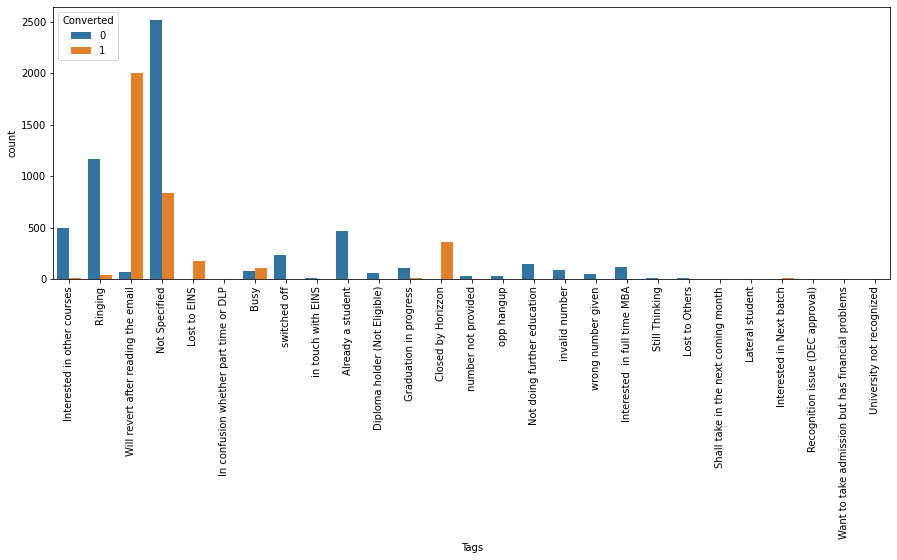

In [ ]:
## plotting spread of variables  after conversation
plt.figure(figsize=(15,5))
s1= sns.countplot(leads['Tags'] , hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)', 'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking', 'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch', 'Recognition issue (DEC approval)','Want to take admission but has financial problems', 'University not recognized'], 'Other_Tags')

In [ ]:
## % missing values

round(100*(leads.isnull().sum()/len(leads.index)),2)


Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [ ]:
## value count for Lead Source  column

leads['Lead Source'].value_counts(dropna=False)



Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [ ]:
## replacing nan and combining low frequency

leads['Lead Source']= leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source']= leads['Lead Source'].replace('google','Google')
leads['Lead Source']= leads['Lead Source'].replace('Facebook', 'Social Media')
leads['Lead Source']= leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM'],'Others')




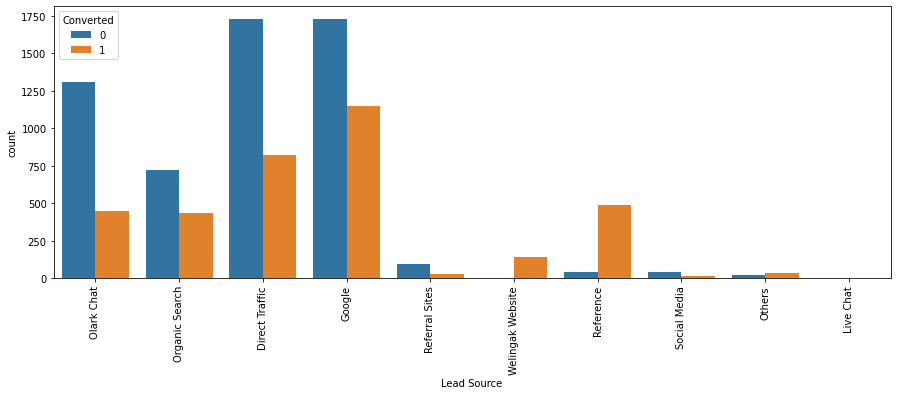

In [ ]:
## plotting spread of variables  after conversation
plt.figure(figsize=(15,5))
s1= sns.countplot(leads['Lead Source'] , hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

INFERENCES

*  Maximum number of leads generated by Google and Direct Traffic
*  convertion rate 9f reference leads and leads through welingak website is high
*   to improve convertion rate focus should be on improving lead conversion of olark chat, organ8c search, direct traffic, and google leads and generate more leads from reference and welingak website





In [ ]:
## last activity

leads['Last Activity'].value_counts(dropna=False)



Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [ ]:
## replacing nan and combining low frequency

leads['Last Activity']= leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity']= leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam', 'Email Received','Resubcribed to emails','Visited Booth in Tradeshow'],'Others')




In [ ]:
## last activity

leads['Last Activity'].value_counts(dropna=False)



Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        307
Email Link Clicked            267
Form Submitted on Website     116
Resubscribed to emails          1
Name: Last Activity, dtype: int64

In [ ]:
## % missing values

round(100*(leads.isnull().sum()/len(leads.index)),2)


Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [ ]:
## dropping all rows with nan values

leads= leads.dropna()

In [ ]:
## % missing values

round(100*(leads.isnull().sum()/len(leads.index)),2)


Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [ ]:
## lead origin

leads['Lead Origin'].value_counts(dropna=False)



Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

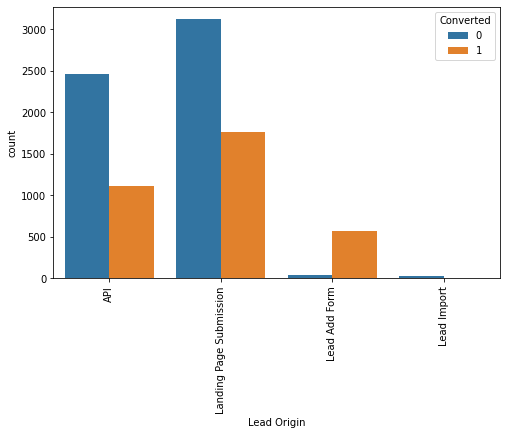

In [ ]:
## plotting spread of variables
plt.figure(figsize=(8,5))
s1= sns.countplot(leads['Lead Origin'] , hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

INFERENCE :

*   API and Landing page submission bring higher no leads as well as conversio
*   lead add form has a very conversion rate but lead count not very hig
*   lead i port and quick add form get very few lead
*   in order to improve overall lead conversion rate, we have to improve lead conversion of api and landing page submission orig8n and yenerate more leads lead add form





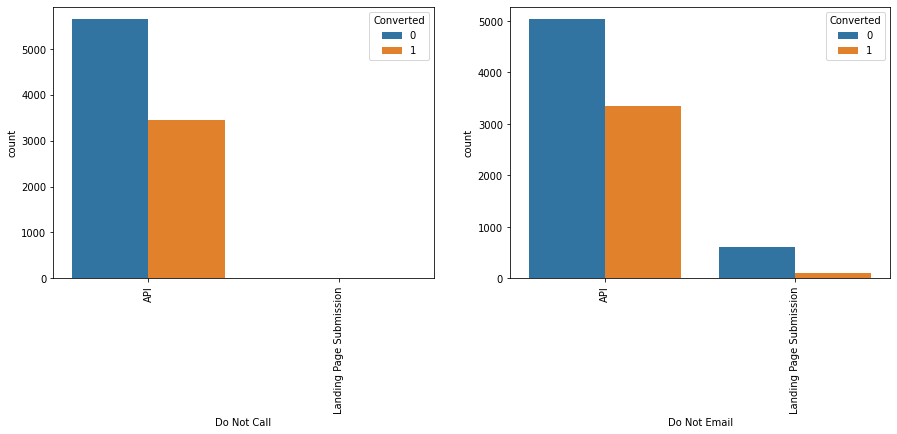

In [ ]:
# do not email and do not call
## plotting spread of variables
plt.figure(figsize=(15,5))

ax1= plt.subplot(1,2,1)
ax1= sns.countplot(leads['Do Not Call'] , hue=leads.Converted)
ax1.set_xticklabels(s1.get_xticklabels(),rotation=90)

ax2= plt.subplot(1,2,2)
ax2= sns.countplot(leads['Do Not Email'] , hue=leads.Converted)
ax2.set_xticklabels(s1.get_xticklabels(),rotation=90)

plt.show()

In [ ]:
## Do Not Cal

leads['Do Not Call'].value_counts(dropna=False)



No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [ ]:
## Do Not Email

leads['Do Not Email'].value_counts(dropna=False)



No     8379
Yes     724
Name: Do Not Email, dtype: int64

append do not call to cols_to_drop

In [ ]:
cols_to_drop.append('Do Not Call')
cols_to_drop

In [ ]:
##imbalanced variable can ge dropped

In [ ]:
leads.Search.value_counts(dropna= False)

No     9089
Yes      14
Name: Search, dtype: int64

In [ ]:
leads.Magazine.value_counts(dropna= False)

No    9103
Name: Magazine, dtype: int64

In [ ]:
leads['Newspaper Article'].value_counts(dropna= False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [ ]:
leads['X Education Forums'].value_counts(dropna= False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [ ]:
leads['Newspaper'].value_counts(dropna= False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [ ]:
leads['Digital Advertisement'].value_counts(dropna= False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [ ]:
leads['Through Recommendations'].value_counts(dropna= False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [ ]:
leads['Receive More Updates About Our Courses'].value_counts(dropna= False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [ ]:
leads['Update me on Supply Chain Content'].value_counts(dropna= False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [ ]:
leads['Get updates on DM Content'].value_counts(dropna= False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [ ]:
leads['I agree to pay the amount through cheque'].value_counts(dropna= False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [ ]:
leads['A free copy of Mastering The Interview'].value_counts(dropna= False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [ ]:
## adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

SyntaxError: ignored

In [ ]:
##last notable activity
leads['Last Notable Activity'].value_counts(dropna= False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [ ]:
## combining low frequency

leads['Last Notable Activity']= leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed', 'Email Bounced','Resubcribed to emails','View in browser link Clicked','Approached upfront','Form Submitted on Website','Email Received'],'Other_Notable_activity')




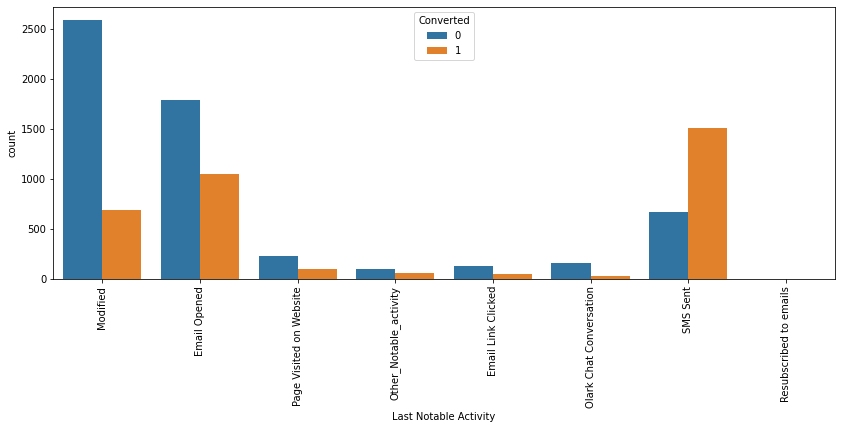

In [ ]:
## plotting spread of variables  after conversation
plt.figure(figsize=(14,5))
ax1= sns.countplot(leads['Last Notable Activity'] , hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
##last notable activity
leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      159
Resubscribed to emails        1
Name: Last Notable Activity, dtype: int64